In [1]:
import pandas as pd
import sklearn
import numpy as np

In [2]:
# This code souldn't be in the Model API  as it here just to mimic usage.
data = pd.read_csv('../data/dataset.csv')
data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [3]:
data.shape

(91713, 85)

Eva's Solution

In [4]:
categorial_features = ["hospital_id", "ethnicity", "gender", "icu_admit_source", "apache_3j_bodysystem", "apache_2_bodysystem", "icu_stay_type", "icu_type"]

data = pd.get_dummies(data,columns=categorial_features)
#reminder: categorial_features = ["hospital_id", "ethnicity", "gender", "icu_admit_source", "apache_3j_bodysystem", "apache_2_bodysystem"]
data.info(verbose=True) #at the end of the list: new columns for categorical features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 269 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    encounter_id                                int64  
 1    patient_id                                  int64  
 2    age                                         float64
 3    bmi                                         float64
 4    elective_surgery                            int64  
 5    height                                      float64
 6    icu_id                                      int64  
 7    pre_icu_los_days                            float64
 8    weight                                      float64
 9    apache_2_diagnosis                          float64
 10   apache_3j_diagnosis                         float64
 11   apache_post_operative                       int64  
 12   arf_apache                                  float64
 13   gcs_eyes_apach

In [5]:
true_values = data.hospital_death
train_data = data.drop('hospital_death', axis=1)

<h5>Split for Train and Test</h5>

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, true_values, test_size=0.2, stratify=true_values, shuffle=True)

In [7]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(x_train)
x_train = imp.transform(x_train)


# Training and Testing

### Initializing models and models parameters

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

import time


# Preparing a list of models:

logisticRegressionIterNum = 100

# Preparing a list of estimators for Voting Classifier 
estimators = [
    ('lr',LogisticRegression()),
    ('dtc',DecisionTreeClassifier()),    
    ('rfc',RandomForestClassifier()),
    ('knc',KNeighborsClassifier())
]

classifiers = [
    LogisticRegression(max_iter=10),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    VotingClassifier(estimators=estimators),
    SVC()
]

labels = [
    "LR",
    "RandomForest",
    "ExtraTrees",
    "GradientBoosting",
    "Votingr",
    "SVC"
]

## Train

In [9]:

# Array to save the fit running times of the model.
fit_running_times = []

def train(x_train, y_train):

    # Fit Loop
    i = 0
    for classifier in classifiers:
        i = i + 1
        # clf_pipline = Pipeline(steps=[("preprocessor", preprocess_pipeline),("classifier", classifier)])
        start_time = time.time()
        # clf_pipline.fit(x_train, y_train)
        classifier.fit(x_train, y_train)
        end_time = time.time()

        fit_running_times.append(f'{round(end_time-start_time,2)}s')

train(x_train=x_train, y_train=y_train)


fit_running_times

C:\Users\bilel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bilel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

['0.79s', '42.44s', '36.8s', '106.51s', '58.72s', '226.67s']

In [10]:
imp = imp.fit(x_test)
x_test = imp.transform(x_test)

## Test

In [11]:

def test(x_test, expected):

    score = []
    names = []

    # Arrays to keep evaluations form the metrics we use.
    precision_score = []
    recall_score = []
    f1_score = []
    accuracy_score = []
    predictions = []

    # Prediction loop

    i = 0
    for classifier in classifiers:

        i = i + 1

        model_prediction = classifier.predict(x_test)
        predictions.append(model_prediction)
        
        precision_score.append(metrics.precision_score(expected, model_prediction))
        recall_score.append(metrics.recall_score(expected, model_prediction))
        f1_score.append( metrics.f1_score(expected, model_prediction))
        accuracy_score.append(metrics.accuracy_score(expected, model_prediction))
        names.append(f'{labels[i-1]}')
        # oversampling.append(f'{over}')

    results_dataFrame = {
        'precision_score': precision_score, 
        'recall_score': recall_score, 
        'f1_score': f1_score,
        'accuracy_score' : accuracy_score,
        # 'oversampling': oversampling,
        'time ': fit_running_times
    }

    results_dataFrame = pd.DataFrame(data=results_dataFrame)
    results_dataFrame.insert(loc=0, column='Method', value=names)

    return predictions, results_dataFrame

models_predictions, pred_results = test(x_test=x_test, expected=y_test)
pred_results

C:\Users\bilel\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bilel\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,precision_score,recall_score,f1_score,accuracy_score,time
0,LR,0.000000,0.000000,0.000000,0.913700,0.79s
1,RandomForest,0.726190,0.231207,0.350743,0.926130,42.44s
2,ExtraTrees,0.756614,0.180670,0.291688,0.924276,36.8s
3,GradientBoosting,0.708397,0.293114,0.414656,0.928583,106.51s
4,Votingr,0.838710,0.016425,0.032218,0.914845,58.72s
5,SVC,0.000000,0.000000,0.000000,0.913700,226.67s


## Evaluation Plots

In [12]:
import matplotlib.pyplot as plt

def plotRoc(fpr, tpr, auc):
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

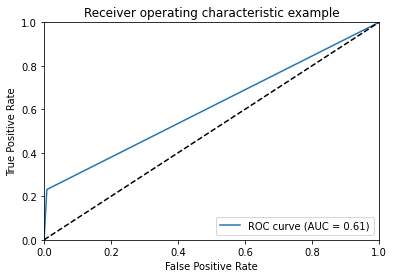

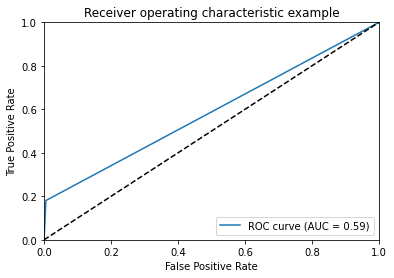

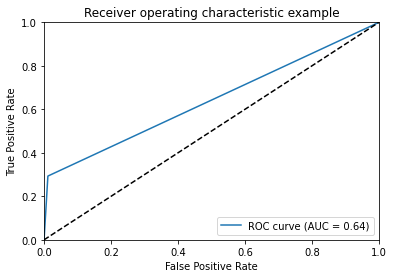

In [13]:

for pred in models_predictions[1:4]:
    auc = metrics.roc_auc_score(y_test, pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    plotRoc(fpr, tpr, auc)
    plt.show()

### Theory on roc metric
1. The data is very very skewed, thus we can't identify correctly the death cases.

# Model Evaluation

In [14]:
import shap
shap.initjs()

In [15]:
def predict_fcn(x):
    return classifiers[2].predict_proba(x)[:,1]

In [16]:
background_data = shap.maskers.Independent(x_train, max_samples=100)
explainer = shap.Explainer(predict_fcn, background_data)

In [17]:
shap_values_500 = explainer(x_train[:500])

Permutation explainer: 501it [05:44,  1.42it/s]                         


### Explaining prediction of false

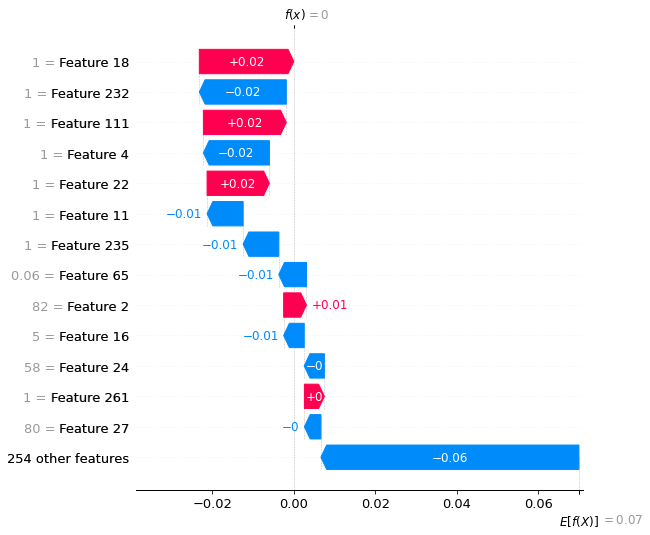

In [18]:
shap.plots.waterfall(shap_values_500[0], max_display=14)

### Explaining prediction of true

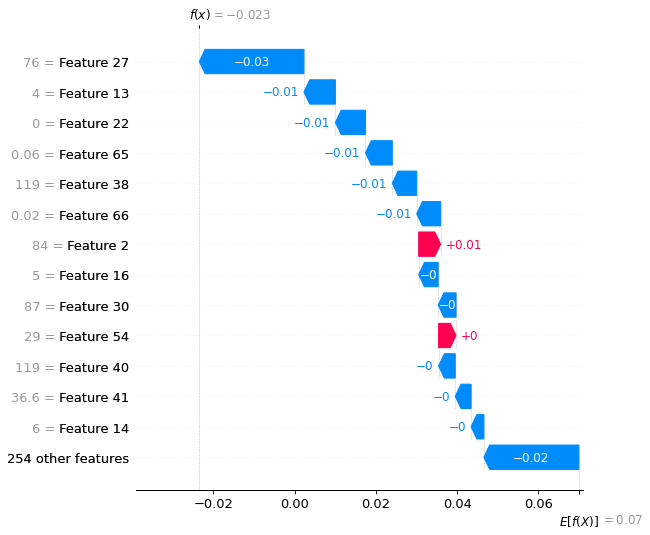

1

In [24]:
shap.plots.waterfall(shap_values_500[3], max_display=14)

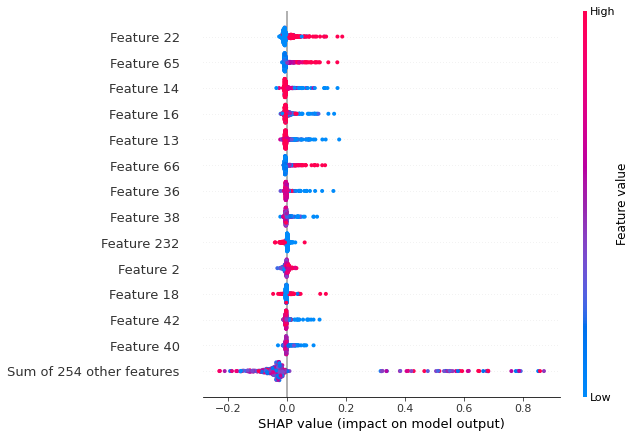

In [20]:
shap.plots.beeswarm(shap_values_500, max_display=14)

# Problems to solve:
1. Skewness of classification.
2. Try different metrics for the models.
3. Get rid of features with low value for the models.
4. Build usable API for the models.